In [231]:
# imports

import pandas as pd
import numpy as np
import wquantiles as wq
from scipy import stats
from statsmodels import robust

In [232]:
# data import

base_path = "./worldbank-literacy-rates-of-males-and-females-ages-15-and-above/data"
literacy_rate_male = pd.read_csv(f"{base_path}/adult_male.csv")
literacy_rate_female = pd.read_csv(f"{base_path}/adult_female.csv")

base_path_population = "./API_SP.POP.TOTL_DS2_en_csv_v2_5436324"
global_population = pd.read_csv(f"{base_path_population}/main.csv", on_bad_lines="skip")
global_population_2021 = global_population[["Country Name", "2021"]].copy()
global_population_2021.set_index("Country Name", inplace=True)
global_population_2021["2021"] = global_population_2021["2021"].div(1000000)

crime_rate = pd.DataFrame(
    {
        "State": ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Conneticut", "Delaware" ],
        "Population": [4779736, 710231, 6392017, 2915918, 37253956, 5029196, 3574097, 897934],
        "Crime Rate": [5.7, 5.6, 4.7, 5.6, 4.4, 2.8, 2.4, 5.8]
    }
)

airport_delay_causes = pd.DataFrame(
    {
        "Carrier": [23.02],
        "ATC": [30.40],
        "Weather": [4.03],
        "Security": [0.12],
        "Inbound": [42.43]
    }
)

display(global_population_2021)
display(global_population_2021.loc[["China"]])

,2021
Country Name,
Aruba,0.106537
Africa Eastern and Southern,702.976832
Afghanistan,40.099462
Africa Western and Central,478.185907
Angola,34.503774
...,...
Kosovo,1.786038
"Yemen, Rep.",32.981641
South Africa,59.392255


,2021
Country Name,
China,1412.36


In [233]:
# functions

# central tendencies
def calculate_means(data_set, column_title, crime_rate_header=None):
    target_column = data_set[column_title]
    print("====== CENTRAL TENDENCIES ======")
    print(f"Mean: {target_column.mean():,}")
    print(f"20% Trimmed Mean: {stats.trim_mean(target_column, 0.2):,}")
    print(f"Median: {target_column.median():,}")
    if crime_rate_header:
        crime_rate_column = data_set[crime_rate_header]
        print(f"Crime Rate Weighted Mean: {np.average(crime_rate_column, weights=target_column)}")
        print(f"Crime Rate Weighted Median: {wq.median(crime_rate_column, weights=target_column)}")
    print("=========== END =========== \n")

# variance
def calculate_variance(data_set, column_title, crime_rate_header=None):
    target_column = data_set[column_title]
    print("====== VARIANCE ======")
    print(f"Standard Deviation: {target_column.std():,}")
    print(f"Interquartile Range: {target_column.quantile(0.75) - target_column.quantile(0.25):,}")
    print(f"Median Absolute Deviation: {stats.median_abs_deviation(target_column, nan_policy='omit'):,}")
    if crime_rate_header:
        crime_rate_column = data_set[crime_rate_header]
    print("=========== END =========== \n")

# distribution (includes data visualizations)
def calculate_distribution(data_set, column_title):
    target_column = data_set[column_title]
    print("====== DATA DISTRIBUTION ======")
    print(f"{column_title} Quantiles:\n{target_column.quantile([0.05, 0.25, 0.5, 0.75, 0.95])}")
    print("=========== END =========== \n")
    
def display_frequency_table(data_set, column_title):
    target_column = data_set[column_title]
    # cut function cuts the data into n equally spaced bins
    binned_population = pd.cut(target_column, 15)
    binned_count = binned_population.value_counts()
    display(binned_count)
    

In [234]:
display(crime_rate)
calculate_means(crime_rate, "Population", crime_rate_header="Crime Rate")
calculate_variance(crime_rate, "Population", crime_rate_header="Crime Rate")
calculate_distribution(crime_rate, "Crime Rate")

,State,Population,Crime Rate
0,Alabama,4779736,5.7
1,Alaska,710231,5.6
2,Arizona,6392017,4.7
3,Arkansas,2915918,5.6
4,California,37253956,4.4
5,Colorado,5029196,2.8
6,Conneticut,3574097,2.4
7,Delaware,897934,5.8


====== CENTRAL TENDENCIES ======
Mean: 7,694,135.625
20% Trimmed Mean: 3,931,483.0
Median: 4,176,916.5
Crime Rate Weighted Mean: 4.376359279149048
Crime Rate Weighted Median: 4.448750497554494
=========== END =========== 

====== VARIANCE ======
Standard Deviation: 12,105,745.29585633
Interquartile Range: 2,958,479.25
Median Absolute Deviation: 1,738,049.5
=========== END =========== 

====== DATA DISTRIBUTION ======
Crime Rate Quantiles:
0.05    2.540
0.25    4.000
0.50    5.150
0.75    5.625
0.95    5.765
Name: Crime Rate, dtype: float64
=========== END =========== 



In [235]:
display(global_population_2021)
calculate_means(global_population_2021, "2021")
calculate_variance(global_population_2021, "2021")
calculate_distribution(global_population_2021, "2021")

,2021
Country Name,
Aruba,0.106537
Africa Eastern and Southern,702.976832
Afghanistan,40.099462
Africa Western and Central,478.185907
Angola,34.503774
...,...
Kosovo,1.786038
"Yemen, Rep.",32.981641
South Africa,59.392255


====== CENTRAL TENDENCIES ======
Mean: 322.32479020754715
20% Trimmed Mean: 22.77274466875
Median: 10.505772
=========== END =========== 

====== VARIANCE ======
Standard Deviation: 1,004.0978660460836
Interquartile Range: 61.802296000000005
Median Absolute Deviation: 10.399755
=========== END =========== 

====== DATA DISTRIBUTION ======
2021 Quantiles:
0.05       0.047981
0.25       1.786038
0.50      10.505772
0.75      63.588334
0.95    1877.104771
Name: 2021, dtype: float64
=========== END =========== 



In [236]:
display_frequency_table(crime_rate, "Population")
display_frequency_table(global_population_2021, "2021")

Population
(673687.275, 3146479.333]       3
(3146479.333, 5582727.667]      3
(5582727.667, 8018976.0]        1
(34817707.667, 37253956.0]      1
(8018976.0, 10455224.333]       0
(10455224.333, 12891472.667]    0
(12891472.667, 15327721.0]      0
(15327721.0, 17763969.333]      0
(17763969.333, 20200217.667]    0
(20200217.667, 22636466.0]      0
(22636466.0, 25072714.333]      0
(25072714.333, 27508962.667]    0
(27508962.667, 29945211.0]      0
(29945211.0, 32381459.333]      0
(32381459.333, 34817707.667]    0
Name: count, dtype: int64

2021
(-7.877, 525.904]       230
(525.904, 1051.798]      10
(1051.798, 1577.691]     10
(1577.691, 2103.584]      4
(2103.584, 2629.477]      4
(3155.37, 3681.263]       2
(6310.729, 6836.622]      2
(4733.05, 5258.943]       1
(5784.836, 6310.729]      1
(7362.516, 7888.409]      1
(2629.477, 3155.37]       0
(3681.263, 4207.157]      0
(4207.157, 4733.05]       0
(5258.943, 5784.836]      0
(6836.622, 7362.516]      0
Name: count, dtype: int64

<Axes: >

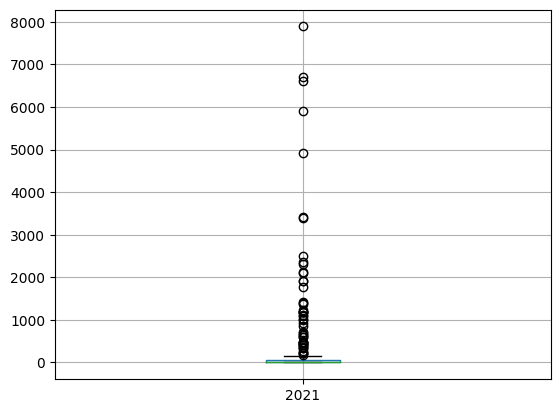

In [237]:
# display box plot of global population (with outliers)

boxplot = global_population_2021.boxplot("2021")
display(boxplot)

<Axes: xlabel='Population (Millions)'>

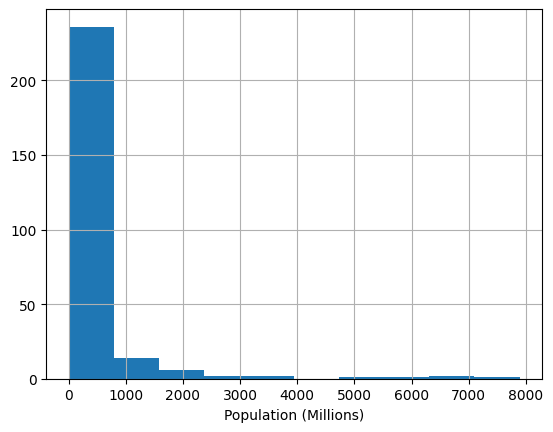

In [238]:
target_column = global_population_2021["2021"]
histogram = target_column.hist()
histogram.set_xlabel("Population (Millions)")
display(histogram)

### A key distinction from the histogram, is the scale of the y-axis: a density plot corresponds to plotting the histogram as a proportion rather than counts. Note that the total area under the density curve = 1, and instead of counts in bins you calculate areas under the curve between any two points on the x-axis, which correspond to the proportion of the distribution lying between those two points.

<Axes: xlabel='Population (Millions)', ylabel='Density'>

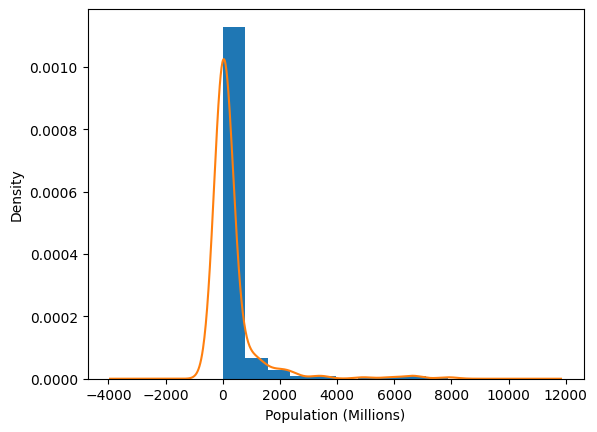

In [239]:
target_column = global_population_2021["2021"]
# density_plot = target_column.plot.hist(density=True, xlim=[0,12], bins=range(1,12))
density_plot = target_column.hist(density=True)
target_column.plot.density(ax=density_plot)
density_plot.set_xlabel('Population (Millions)')
display(density_plot)

# Categorical Data

,Carrier,ATC,Weather,Security,Inbound
0,23.02,30.4,4.03,0.12,42.43


<Axes: xlabel='Cause of delay', ylabel='Count'>

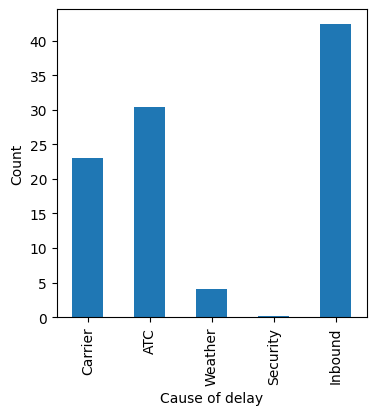

In [240]:
# categorical data
display(airport_delay_causes)

# bar chart
bar_chart = airport_delay_causes.transpose().plot.bar(figsize=(4, 4), legend=False)
bar_chart.set_xlabel('Cause of delay')
bar_chart.set_ylabel('Count')
display(bar_chart)

A special type of categorical data is data in which the categories represent or can be mapped to discrete values on the same scale. A marketer for a new cloud technology, for example, offers two levels of service, one priced at $300/month and another at $50/month. The marketer offers free webinars to generate leads, and the firm figures that 5% of the attendees will sign up for the $300 service, 15% will sign up for the $50 service, and 80% will not sign up for anything. This data can be summed up, for financial purposes, in a single “expected value,” which is a form of weighted mean, in which the weights are probabilities. 

The expected value is calculated as follows:
```
1. Multiply each outcome by its probability of occurrence.
2. Sum these values.
```
In the cloud service example, the expected value of a webinar attendee is thus $22.50 per month, calculated as follows:
```
EV = 0 . 05 300 + 0 . 15 50 + 0 . 80 0 = 22 . 5
```

The expected value is really a form of weighted mean: it adds the ideas of future expectations and probability weights, often based on subjective judgment. Expected value is a fundamental concept in business valuation and capital budgeting.